## Principal Components Analysis using demo matrix

## 🧠 Intuition Behind PCA

PCA tries to:

Find new axes (called principal components) that maximize variance.

Project high-dimensional data onto these axes to reduce dimensions while preserving most of the information (variance).

## 📐 Math Steps in PCA

Let’s assume we have a dataset X with n rows and d features (columns).

### Step 1: Standardize the Data

We subtract the mean and (optionally) divide by the standard deviation.

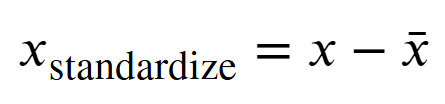

This ensures that all features have zero mean.

### Step 2: Compute the Covariance Matrix

The covariance matrix shows how variables vary together.

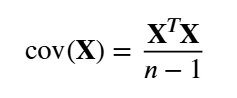

This will be a d × d matrix.

### Step 3: Calculate Eigenvalues and Eigenvectors

Solve the equation:

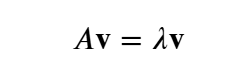

Where:

𝐴 - A is the covariance matrix.

𝜆 - λ is the eigenvalue.

𝑣 - v is the eigenvector (principal component direction).

Eigenvectors = directions of maximum variance

Eigenvalues = amount of variance in each direction

### Step 4: Sort Eigenvalues and Select Top K Components

Rank eigenvectors by their eigenvalues. The top k eigenvectors form your new axes for projection.

### Step 5: Project Data onto New Axes

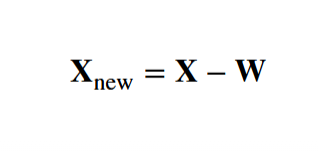

Where W is the matrix of top k eigenvectors.

#### Simple 2D dataset and reduce it to 1D using PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Sample dataset (2D)
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

In [3]:
X.shape

(10, 2)

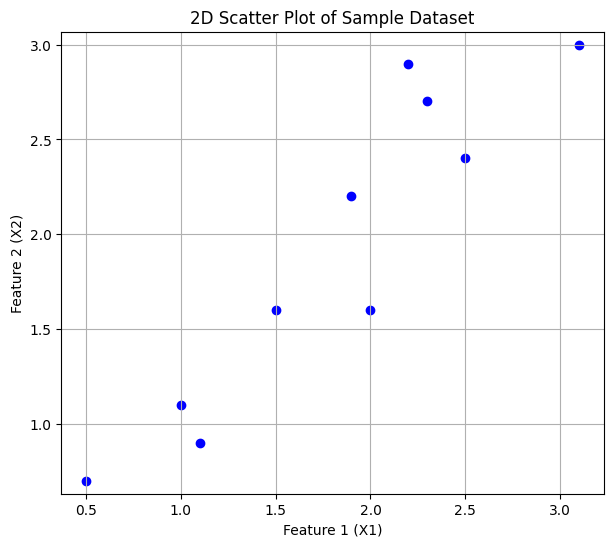

In [4]:
# Plotting
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', marker='o')

plt.title("2D Scatter Plot of Sample Dataset")
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.grid(True)
plt.axis('equal')
plt.show()

In [5]:
# Step 2: Standardize the data (zero mean)
X_meaned = X - np.mean(X, axis=0)

In [6]:
X_meaned

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

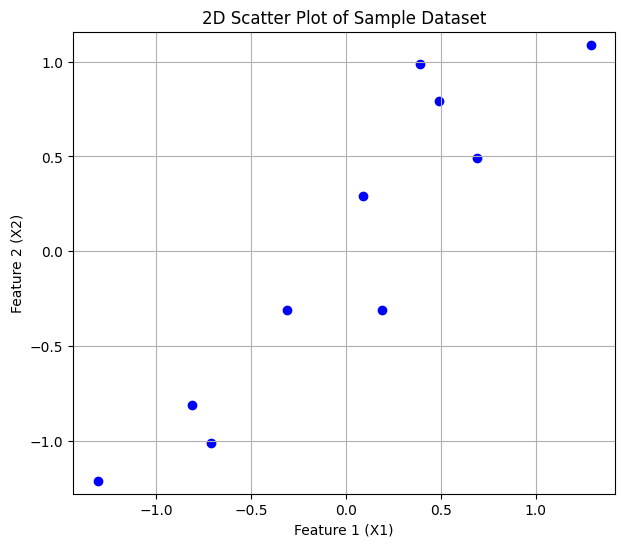

In [7]:
# Plotting
plt.figure(figsize=(7, 6))
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], color='blue', marker='o')

plt.title("2D Scatter Plot of Sample Dataset")
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.grid(True)
plt.axis('equal')
plt.show()

In [8]:
# Step 3: Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

In [9]:
cov_matrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [10]:
# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# This function is from NumPy’s linear algebra module (np.linalg).

# Each eigenvector gives a direction in the feature space (a principal component).
# Each eigenvalue tells you how much variance is in that direction.

In [11]:
print(f"eigenvalues: \n {eigenvalues}")
print(f"eigenvectors: \n {eigenvectors}")

eigenvalues: 
 [0.0490834  1.28402771]
eigenvectors: 
 [[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]


In [73]:
# Step 5: Sort eigenvectors by eigenvalues (descending order)
sorted_idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

In [74]:
print(sorted_idx)


# [0.0490834  1.28402771]   -- [1.28402771  0.0490834]  - [1 0]

[1 0]


In [75]:
eigenvalues = eigenvalues[sorted_idx]
print(f"Sorted eigenvalues: \n {eigenvalues}")

Sorted eigenvalues: 
 [1.28402771 0.0490834 ]


[[-0.73517866    0.6778734 ]

 [ 0.6778734     0.73517866]]

In [76]:
eigenvectors = eigenvectors[:, sorted_idx]
print(f"Sorted eigenvectors: \n {eigenvectors}")

Sorted eigenvectors: 
 [[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]


✅ What's the Goal?
We want to sort the eigenvectors according to the magnitude of their corresponding eigenvalues, from highest to lowest.
This is important because:

Higher eigenvalue = more variance explained by that component.

PCA keeps the top k components (directions) that capture most of the variance.

🧠 Line-by-line Explanation:
🔹 sorted_idx = np.argsort(eigenvalues)[::-1]
np.argsort(eigenvalues) returns the indices that would sort the eigenvalues in ascending order.

Adding [::-1] reverses the order to descending.

👉 Example:
If eigenvalues = [2.3, 5.1, 1.0],
Then sorted_idx = [1, 0, 2] (because 5.1 > 2.3 > 1.0)

🔹 eigenvalues = eigenvalues[sorted_idx]
Reorders the eigenvalues so that they are in descending order.

🔹 eigenvectors = eigenvectors[:, sorted_idx]
Reorders the columns of the eigenvector matrix to match the sorted eigenvalues.

👉 Why columns?
Because each column in eigenvectors is an eigenvector, corresponding to an eigenvalue.

In [85]:
# Step 6: Choose top k eigenvectors (k=1 here)
k = 1
eigenvectors_subset = eigenvectors[:, :k]

In [86]:
eigenvectors_subset

array([[0.6778734 ],
       [0.73517866]])

In [80]:
# Step 7: Transform the data (project onto principal components)
X_reduced = np.dot(X_meaned, eigenvectors_subset)

In [81]:
print("Original dataset: ", X)

Original dataset:  [[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


In [82]:
print("Reduced Data (1D):\n", X_reduced)

Reduced Data (1D):
 [[ 0.82797019]
 [-1.77758033]
 [ 0.99219749]
 [ 0.27421042]
 [ 1.67580142]
 [ 0.9129491 ]
 [-0.09910944]
 [-1.14457216]
 [-0.43804614]
 [-1.22382056]]


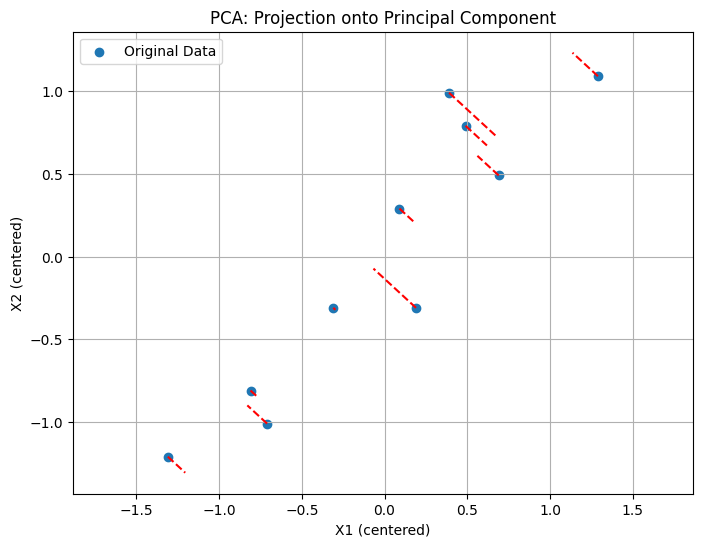

In [83]:
# Plot original and projected data
plt.figure(figsize=(8,6))
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], label='Original Data')
for point, proj in zip(X_meaned, X_reduced):
    proj_back = proj * eigenvectors_subset.T
    plt.plot([point[0], proj_back[0,0]], [point[1], proj_back[0,1]], 'r--')
plt.xlabel("X1 (centered)")
plt.ylabel("X2 (centered)")
plt.title("PCA: Projection onto Principal Component")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
